In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
import os
import requests
from sklearn.linear_model import LogisticRegression

In [3]:
url = 'https://lazyprogrammer.me/course_files/AirlineTweets.csv'
r = requests.get(url, allow_redirects=True)

from io import StringIO
data = StringIO(r.text)
df=pd.read_csv(data,encoding='ISO-8859-1')

In [4]:
np.random.seed(1)

In [5]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [6]:
df1=df[['airline_sentiment','text']].copy()

In [7]:
df1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

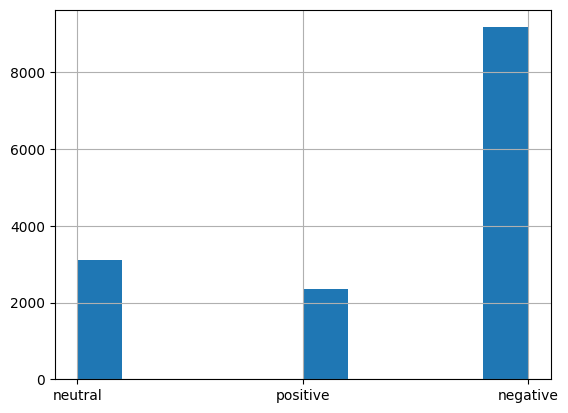

In [8]:
df['airline_sentiment'].hist()

In [12]:
target_map={'positive':1,'negative':0,'neutral':2}
df1['target']=df1['airline_sentiment'].map(target_map)

In [13]:
df1.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [16]:
df_train,df_test=train_test_split(df1)

In [17]:
df_train.head()

,airline_sentiment,text,target
4148,negative,@united here I was thinking how I could say so...,0
14166,negative,@AmericanAir fight got Cancelled Flighted can ...,0
5909,positive,@SouthwestAir Thank you. Great tool,1
2470,negative,.@united too much info to share via tweet. Ple...,0
4652,negative,@SouthwestAir but when do I get my gin &amp; t...,0


In [18]:
vectorizer=TfidfVectorizer(max_features=2000)

In [19]:
x_train=vectorizer.fit_transform(df_train['text'])
x_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157623 stored elements in Compressed Sparse Row format>

In [20]:
x_test=vectorizer.transform(df_test['text'])
x_test

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52267 stored elements in Compressed Sparse Row format>

In [21]:
y_train=df_train['target']
y_test=df_test['target']

In [22]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

print('train acc :',model.score(x_train,y_train))
print('test acc :',model.score(x_test,y_test))

train acc : 0.8551001821493625
test acc : 0.7991803278688525


In [23]:
pr_train=model.predict_proba(x_train)
pr_test=model.predict_proba(x_test)

In [25]:
print('train auc:',roc_auc_score(y_train,pr_train,multi_class='ovo'))
print('test auc:',roc_auc_score(y_test,pr_test,multi_class='ovo'))

train auc: 0.9423869555259191
test auc: 0.8954336000106595


In [26]:
ptrain=model.predict(x_train)
ptest=model.predict(x_test)

In [27]:
cm=confusion_matrix(y_train,ptrain,normalize='true')
cm

array([[0.9624311 , 0.00913838, 0.02843052],
       [0.19417476, 0.71102227, 0.09480297],
       [0.30449679, 0.04925054, 0.64625268]])